# Assignment 2

In [291]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import os
import requests
from io import BytesIO

# Import the used car dataset

Download the dataset and upload to Google Colab
https://app.box.com/s/jm6pw202asu4xd3uypwtry2rqk691y1i

In [292]:
# Load the dataset
car_data = pd.read_csv('train.csv')
print(car_data.shape)
car_data.head(20)

(5847, 14)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
5,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
6,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
7,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95
8,10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
9,11,Honda City 1.5 V AT Sunroof,Kolkata,2012,60000,Petrol,Automatic,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,NaN,4.49


In [293]:
# Drop index column
car_data = car_data.drop(columns=['Unnamed: 0'])

# Explore dataset properties

In [294]:
# Create a copy of the dataframe for cleaning
car_data_copy = car_data.copy()

In [295]:
# Check for null and NaN values
print(car_data_copy.isna().sum())

# Check feature types
car_data_copy.dtypes

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


,0
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,object
Engine,object
Power,object


In [296]:
# Show unique values to view various units in Mileage
car_data_copy['Mileage'].dropna().unique()

array(['19.67 kmpl', '13 km/kg', '20.77 kmpl', '15.2 kmpl', '23.08 kmpl',
       '11.36 kmpl', '20.54 kmpl', '22.3 kmpl', '21.56 kmpl', '16.8 kmpl',
       '25.2 kmpl', '12.7 kmpl', '0.0 kmpl', '13.5 kmpl', '25.8 kmpl',
       '28.4 kmpl', '20.45 kmpl', '14.84 kmpl', '22.69 kmpl',
       '23.65 kmpl', '13.53 kmpl', '18.5 kmpl', '14.4 kmpl',
       '16.48 km/kg', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '9.49 km/kg', '18.2 kmpl',
       '13.68 kmpl', '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl',
       '24.52 kmpl', '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl',
       '19.64 kmpl', '16.5

In [297]:
# Convert km/kg to kmpl
def convert_mileage(value):
    if pd.isna(value):
        return None
    if 'km/kg' in value:
        val = float(value.replace(' km/kg', '').strip())
        return round(val * 1.5, 2)  # Convert to approx kmpl
    elif 'kmpl' in value:
        return float(value.replace(' kmpl', '').strip())
    else:
        return None  # unexpected unit

# Apply to the Mileage column
car_data_copy['Mileage_kmpl'] = car_data_copy['Mileage'].apply(convert_mileage)


In [298]:
car_data_copy.drop(columns=['Mileage'], inplace=True)
car_data_copy.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Mileage_kmpl
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,19.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,1461 CC,63.1 bhp,5.0,NaN,3.50,23.08


In [299]:
# Drop 2 NaN rows in mileage due to only 2 of over 5000 samples
car_data_copy = car_data_copy.dropna(subset=['Mileage_kmpl'])
car_data_copy.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Engine,36
Power,36
Seats,38


Drop 36 NaN rows from Engine due to only 36 NaN values in over 5000 samples

In [300]:
car_data_copy = car_data_copy.dropna(subset=['Engine'])
car_data_copy.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Engine,0
Power,0
Seats,2


View units for Engine and replace for numeric

In [301]:
# Engine (expecting " CC")
car_data_copy['Engine'].dropna().apply(
    lambda x: re.findall(r'[a-zA-Z]+', x)[0] if re.findall(r'[a-zA-Z]+', x) else 'unknown'
).value_counts()


,count
Engine,
CC,5809


In [302]:
# Remove CC from numeric value and convert string to numeric
car_data_copy['Engine'] = car_data_copy['Engine'].str.replace(' CC', '', regex=False)
car_data_copy['Engine'] = pd.to_numeric(car_data_copy['Engine'], errors='coerce')

# After converting to numeric
car_data_copy.rename(columns={'Engine': 'Engine_CC'}, inplace=True)
car_data_copy.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Power,Seats,New_Price,Price,Mileage_kmpl
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582,126.2 bhp,5.0,NaN,12.50,19.67
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199,88.7 bhp,5.0,8.61 Lakh,4.50,19.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248,88.76 bhp,7.0,NaN,6.00,20.77
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.8 bhp,5.0,NaN,17.74,15.20
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,1461,63.1 bhp,5.0,NaN,3.50,23.08


View units for Power, convert if needed and replace with numeric

In [303]:
car_data_copy['Power'].dropna().unique()[:20]

array(['126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp', '63.1 bhp',
       '171.5 bhp', '103.6 bhp', '74 bhp', '103.25 bhp', '116.3 bhp',
       '187.7 bhp', '115 bhp', '175.56 bhp', '98.6 bhp', '83.8 bhp',
       '167.62 bhp', '190 bhp', '88.5 bhp', '177.01 bhp', '80 bhp'],
      dtype=object)

In [304]:
# Remove ' bhp' and convert to float
car_data_copy['Power'] = car_data_copy['Power'].str.replace(' bhp', '', regex=False)
car_data_copy['Power'] = pd.to_numeric(car_data_copy['Power'], errors='coerce')
car_data_copy.rename(columns={'Power': 'Power_bhp'}, inplace=True)
car_data_copy.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Power_bhp,Seats,New_Price,Price,Mileage_kmpl
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5.0,NaN,12.50,19.67
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5.0,8.61 Lakh,4.50,19.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7.0,NaN,6.00,20.77
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5.0,NaN,17.74,15.20
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,1461,63.10,5.0,NaN,3.50,23.08


Drop 2 NaN rows in seats and convert to integer

In [305]:
# Drop NaN Seats due to only 2 rows with NaN
car_data_copy = car_data_copy.dropna(subset=['Seats'])

# Convert to integer
car_data_copy.loc[:, 'Seats'] = car_data_copy['Seats'].astype(int)

car_data_copy.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Engine_CC,0
Power_bhp,0
Seats,0


In [306]:
car_data_copy.shape

(5807, 13)

Drop New_Price due to over 85% of the column having NaN value

In [307]:
car_data_copy.drop(columns=['New_Price'], inplace=True)

<ipython-input-307-8a327eb9e037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_copy.drop(columns=['New_Price'], inplace=True)


In [308]:
car_data_copy.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Engine_CC,0
Power_bhp,0
Seats,0


# c) Change the categorical variables (“Fuel_Type” and “Transmission”) into numerical one hot encoded value.
One-Hot Encoding for Fuel_Type, Transmission and Owner_Type

In [309]:
print(car_data_copy['Fuel_Type'].unique())
print(car_data_copy['Transmission'].unique())

['Diesel' 'Petrol']
['Manual' 'Automatic']


In [310]:
# One-Hot Encoding
car_data_copy = pd.get_dummies(
    car_data_copy,
    columns=['Fuel_Type', 'Transmission'],
    drop_first=True
)

In [311]:
car_data_copy.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Engine_CC,Power_bhp,Seats,Price,Mileage_kmpl,Fuel_Type_Petrol,Transmission_Manual
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,1582,126.20,5.0,12.50,19.67,False,True
1,Honda Jazz V,Chennai,2011,46000,First,1199,88.70,5.0,4.50,19.50,True,True
2,Maruti Ertiga VDI,Chennai,2012,87000,First,1248,88.76,7.0,6.00,20.77,False,True
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,1968,140.80,5.0,17.74,15.20,False,False
4,Nissan Micra Diesel XV,Jaipur,2013,86999,First,1461,63.10,5.0,3.50,23.08,False,True


# d) Create one more feature and add this column to the dataset

Car_Age addition

In [312]:
car_data_copy['Car_Age'] = 2025 - car_data_copy['Year']

Kms_per_Year - Kilometers driver per year

In [313]:
car_data_copy['Kms_per_Year'] = (car_data_copy['Kilometers_Driven'] / car_data_copy['Car_Age']).round(2)

Is_Luxury_Brand - Categorize luxury vs non-luxury vehicles

In [314]:
luxury_brands = ['BMW', 'Audi', 'Mercedes', 'Land Rover', 'Jaguar', 'Volvo']
car_data_copy['Is_Luxury'] = car_data_copy['Name'].apply(
    lambda x: any(brand in x for brand in luxury_brands)
)

In [315]:
car_data_copy.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Engine_CC,Power_bhp,Seats,Price,Mileage_kmpl,Fuel_Type_Petrol,Transmission_Manual,Car_Age,Kms_per_Year,Is_Luxury
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,1582,126.20,5.0,12.50,19.67,False,True,10,4100.00,False
1,Honda Jazz V,Chennai,2011,46000,First,1199,88.70,5.0,4.50,19.50,True,True,14,3285.71,False
2,Maruti Ertiga VDI,Chennai,2012,87000,First,1248,88.76,7.0,6.00,20.77,False,True,13,6692.31,False
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,1968,140.80,5.0,17.74,15.20,False,False,12,3389.17,True
4,Nissan Micra Diesel XV,Jaipur,2013,86999,First,1461,63.10,5.0,3.50,23.08,False,True,12,7249.92,False


Export clean data to csv

In [316]:
car_data_clean = car_data_copy.copy()

# Task (e) — select, filter, rename, mutate, arrange, group_by

In [317]:
# Select
selected_df = car_data_clean[['Name', 'Year', 'Car_Age', 'Price', 'Mileage_kmpl', 'Fuel_Type_Petrol', 'Transmission_Manual']]
selected_df.head()

,Name,Year,Car_Age,Price,Mileage_kmpl,Fuel_Type_Petrol,Transmission_Manual
0,Hyundai Creta 1.6 CRDi SX Option,2015,10,12.50,19.67,False,True
1,Honda Jazz V,2011,14,4.50,19.50,True,True
2,Maruti Ertiga VDI,2012,13,6.00,20.77,False,True
3,Audi A4 New 2.0 TDI Multitronic,2013,12,17.74,15.20,False,False
4,Nissan Micra Diesel XV,2013,12,3.50,23.08,False,True


In [318]:
# Filter - cars under 7 years old and priced over ₹10 lakh
filtered_df = car_data_clean[(car_data_copy['Car_Age'] <= 7) & (car_data_copy['Price'] > 10)]
filtered_df[['Name', 'Car_Age', 'Price']].head()


,Name,Car_Age,Price
65,Mercedes-Benz C-Class Progressive C 220d,6,35.67
67,Hyundai Creta 1.4 E Plus Diesel,7,10.50
87,Audi A6 2011-2015 35 TDI Premium,7,39.58
116,Hyundai Verna CRDi 1.6 SX Option,7,10.95
128,Hyundai Verna VTVT 1.6 AT SX Plus,6,11.50


In [319]:
# Rename - rename price column
car_data_clean.rename(columns={'Price': 'Selling_Price_Lakh'}, inplace=True)
car_data_clean.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Engine_CC,Power_bhp,Seats,Selling_Price_Lakh,Mileage_kmpl,Fuel_Type_Petrol,Transmission_Manual,Car_Age,Kms_per_Year,Is_Luxury
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,1582,126.20,5.0,12.50,19.67,False,True,10,4100.00,False
1,Honda Jazz V,Chennai,2011,46000,First,1199,88.70,5.0,4.50,19.50,True,True,14,3285.71,False
2,Maruti Ertiga VDI,Chennai,2012,87000,First,1248,88.76,7.0,6.00,20.77,False,True,13,6692.31,False
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,1968,140.80,5.0,17.74,15.20,False,False,12,3389.17,True
4,Nissan Micra Diesel XV,Jaipur,2013,86999,First,1461,63.10,5.0,3.50,23.08,False,True,12,7249.92,False


In [320]:
# Mutate - Add a price per horsepower feature
car_data_clean['Price_per_bhp'] = (car_data_clean['Selling_Price_Lakh'] / car_data_clean['Power_bhp']).round(2)
car_data_clean.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Engine_CC,Power_bhp,Seats,Selling_Price_Lakh,Mileage_kmpl,Fuel_Type_Petrol,Transmission_Manual,Car_Age,Kms_per_Year,Is_Luxury,Price_per_bhp
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,1582,126.20,5.0,12.50,19.67,False,True,10,4100.00,False,0.10
1,Honda Jazz V,Chennai,2011,46000,First,1199,88.70,5.0,4.50,19.50,True,True,14,3285.71,False,0.05
2,Maruti Ertiga VDI,Chennai,2012,87000,First,1248,88.76,7.0,6.00,20.77,False,True,13,6692.31,False,0.07
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,1968,140.80,5.0,17.74,15.20,False,False,12,3389.17,True,0.13
4,Nissan Micra Diesel XV,Jaipur,2013,86999,First,1461,63.10,5.0,3.50,23.08,False,True,12,7249.92,False,0.06


In [321]:
# Arrange - Sort by price descending
sorted_df = car_data_clean.sort_values(by='Selling_Price_Lakh', ascending=False)
sorted_df[['Name', 'Selling_Price_Lakh']].head()

,Name,Selling_Price_Lakh
3952,Land Rover Range Rover 3.0 Diesel LWB Vogue,160.00
5620,Lamborghini Gallardo Coupe,120.00
5752,Jaguar F Type 5.0 V8 S,100.00
1457,Land Rover Range Rover Sport SE,97.07
1917,BMW 7 Series 740Li,93.67


In [322]:
# Summarize with group by operations - Group by Luxury vs Non-Luxury and get average price and mileage
summary = car_data_clean.groupby('Is_Luxury')[['Selling_Price_Lakh', 'Mileage_kmpl']].mean().round(2)
print(summary)

           Selling_Price_Lakh  Mileage_kmpl
Is_Luxury                                  
False                    6.32         18.82
True                    27.23         15.02


# Create some visuals to put in results folder

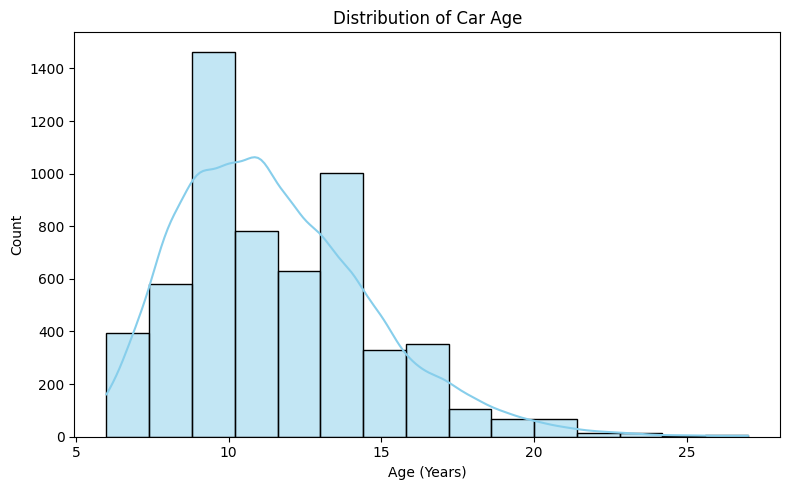

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(car_data_clean['Car_Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Car Age')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('car_age_distribution.png')
plt.show()

<ipython-input-324-fa3859fda87d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=luxury_summary, x='Is_Luxury', y='Selling_Price_Lakh', palette='viridis')


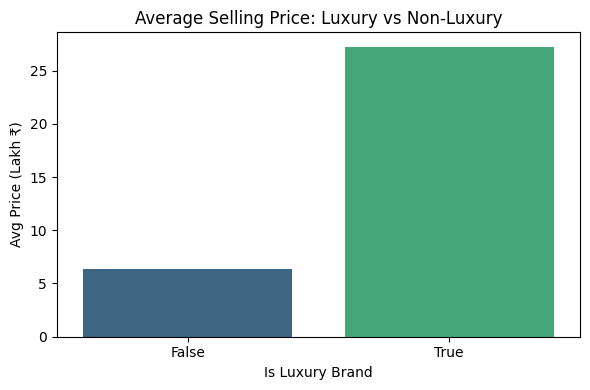

In [324]:
luxury_summary = car_data_clean.groupby('Is_Luxury')['Selling_Price_Lakh'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=luxury_summary, x='Is_Luxury', y='Selling_Price_Lakh', palette='viridis')
plt.title('Average Selling Price: Luxury vs Non-Luxury')
plt.ylabel('Avg Price (Lakh ₹)')
plt.xlabel('Is Luxury Brand')
plt.tight_layout()
plt.savefig('luxury_vs_price.png')
plt.show()

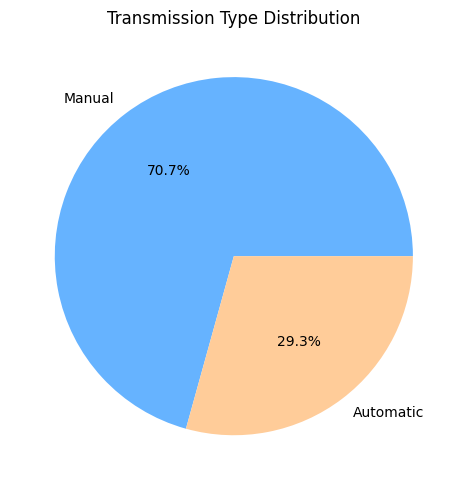

In [325]:
# Transmission Type Share
transmission_counts = car_data_clean['Transmission_Manual'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(transmission_counts, labels=['Manual', 'Automatic'], autopct='%1.1f%%', colors=['#66b3ff','#ffcc99'])
plt.title('Transmission Type Distribution')
plt.tight_layout()
plt.savefig('transmission_share.png')
plt.show()

In [326]:
car_data_clean.to_csv('cleaned_used_car_data.csv', index=False)
# Download to PC
from google.colab import files
files.download('cleaned_used_car_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>